In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# Part A
## Noise Removal

In [14]:
def Compute_Fourier(img):
    image = img.copy()
    fourier = np.fft.fftshift(np.fft.fft2(image))
    return fourier

# def Compute_Phase_Magnitude(img):
#     fourier = Compute_Fourier(img)
#     phase = np.angle(fourier)
#     magnitude = np.abs(fourier)
#     return phase, magnitude

# def Restore_Image(magnitude, phase):
#     result_image = np.fft.ifft2(np.fft.ifftshift(magnitude * np.exp(1j * phase)))
#     return np.abs(result_image)
    
def Load_Image(img_path):
    img = cv2.imread(img_path, 0) # Grayscale
    return img

def Eliminate_Noise(image):
    noiseless_img = image.copy() 
       
    x = noiseless_img.shape[0]
    y = noiseless_img.shape[1]
    
    # Convert to frequency domain
    fourier = np.fft.fft2(noiseless_img)
    shifted_fourier = np.fft.fftshift(fourier)

    # Plotting FFT
    plt.axis('off')
    plt.imshow(np.abs(fourier), norm=LogNorm(vmin=5))
    plt.title("noisy image in domian frequence(not shifted)")
    plt.show()
    plt.imshow(np.abs(shifted_fourier), norm=LogNorm(vmin=5))
    plt.axis('off')
    plt.title("noisy image in domian frequence(shifted)")
    plt.show()
    
    # Remove 76% of middle frequencies and keep 12% of begin and 12% of end frequencies (for of circularity of frequence)
    ratio = 0.12
    fourier[:, int(y * ratio):int(y * (1 - ratio))] = 0
    fourier[int(x * ratio):int(x * (1 - ratio))] = 0
    plt.axis('off')
    plt.imshow(np.abs(fourier), norm=LogNorm(vmin=4))
    plt.title("noisy image after ignoring some frequencies(in not shifted freq)")    
    plt.show()
    
    # Convert to space domain
    noiseless_img = np.fft.ifft2(fourier).real
    return noiseless_img

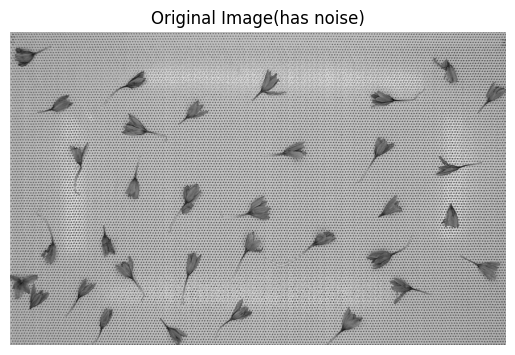

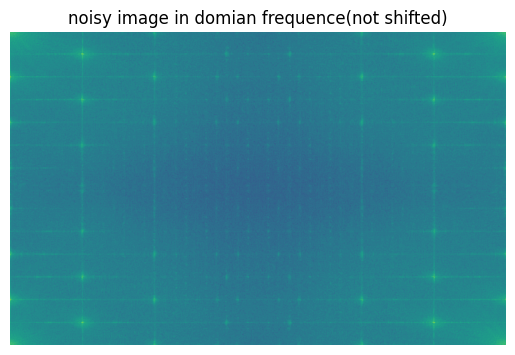

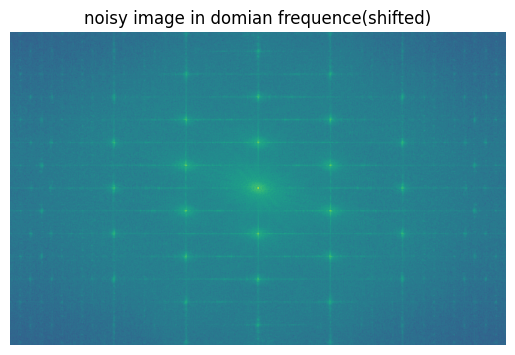

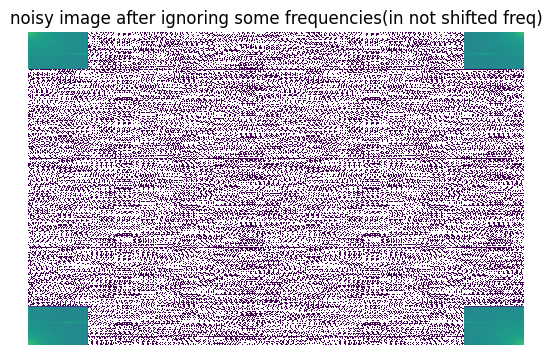

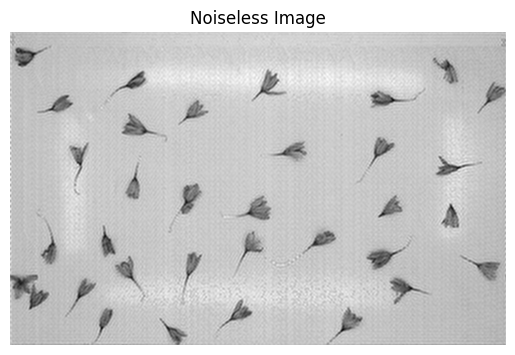

True

In [15]:
noisy_image = cv2.imread("./saffrun.jpg", 0)
plt.axis('off')
plt.imshow(noisy_image, cmap="gray")
plt.title("Original Image(has noise)")
plt.show()

noiseless_img = Eliminate_Noise(noisy_image)
plt.axis('off')
plt.imshow(noiseless_img, cmap="gray")
plt.title("Noiseless Image")
plt.show()
cv2.imwrite("Q3_A_final_result.png", noiseless_img)

# Part B
## Finding Flowers using Canny edge detector

In [40]:
def Find_Edges_Canny(img, low, high):
    # Apply Canny edge detection
    edges = cv2.Canny(img, low, high)
    return edges

True

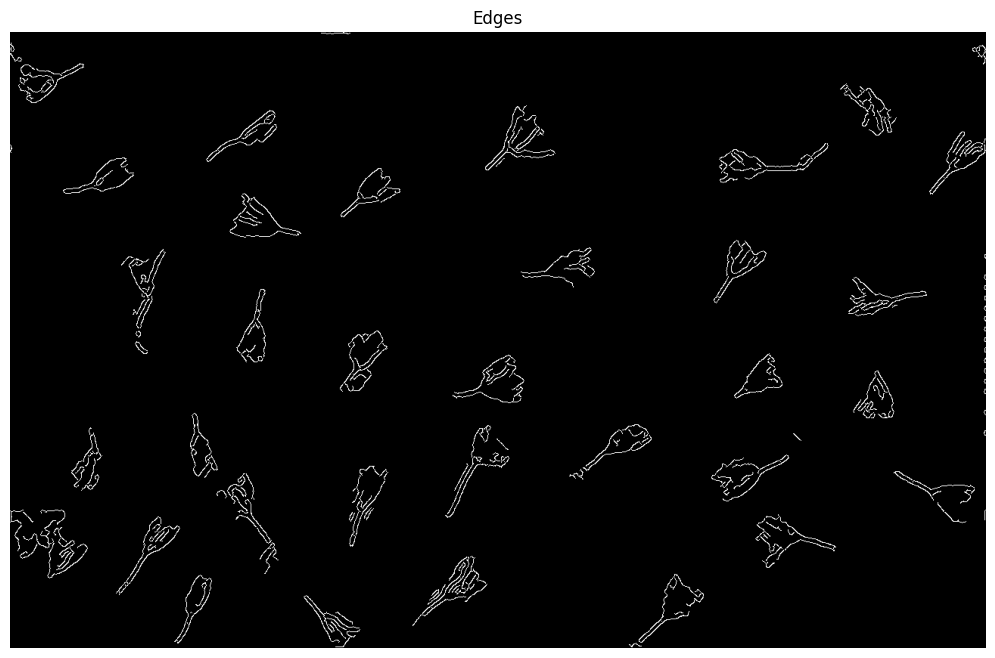

In [144]:
img = cv2.imread("./Q3_A_final_result.png", 0)
edges = Find_Edges_Canny(img, 45, 130)
plt.title('Edges')
plt.axis('off')
plt.imshow(edges, cmap='gray')
cv2.imwrite("Q3_B_result.png", edges)

# Part C
## Gradient

In [135]:
def Gradient_Directions(img):
    direction = np.zeros(img.shape)
    
    # Perform Sobel to Get d(img)/dx and d(img)/dy
    gy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    gx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

    size_img =len(direction)
    a = len(direction[0])
    for i in range (size_img):
        for j in range(a): 
            direction[i,j] = math.atan2(gy[i,j],gx[i,j]) # Gradient Angle
            if directions[i,j] < 0:
                directions[i,j] += 360
    return direction

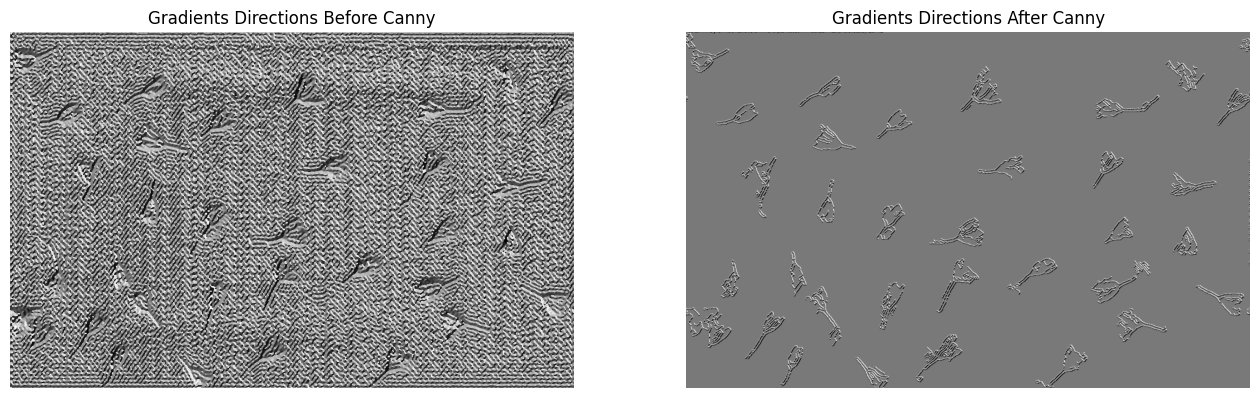

In [138]:
img = cv2.imread("./Q3_A_final_result.png", 0)

directions_before = Gradient_Directions(img)
directions_after = Gradient_Directions(edges)

plt.subplot(1,2,1)
plt.imshow(directions_before, cmap="gray")
plt.title('Gradients Directions Before Canny')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(directions_after, cmap="gray")
plt.title('Gradients Directions After Canny')
plt.axis('off')

plt.show()
